# SHAP Tutorial 
<br>
Applying and interpreting the Python SHAP Package 
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone

In [17]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance

import shap
shap.initjs()

from sklearn.metrics import accuracy_score,confusion_matrix

path = "/Users/conorosully/Google Drive/Medium/SHAP Tutorial/Figures/{}"

## Dataset

In [2]:
#import dataset
data = pd.read_csv("../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

y = data['rings']
X = data.drop('rings', axis=1)

print(len(data))
data.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration

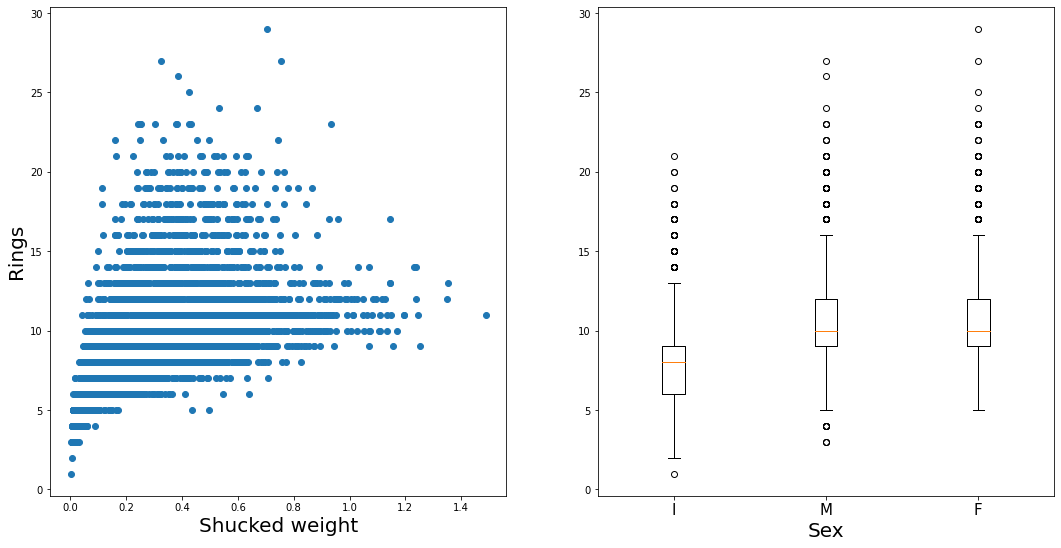

In [3]:
plt.figure(figsize=(18, 9))

#Plot 1
plt.subplot(121)
plt.scatter(data['shucked weight'],data['rings'])

plt.ylabel('Rings',size=20)
plt.xlabel('Shucked weight',size=20)

#Plot 2
plt.subplot(122)
plt.boxplot(data[data.sex=='I']['rings'],positions=[1])
plt.boxplot(data[data.sex=='M']['rings'],positions=[2])
plt.boxplot(data[data.sex=='F']['rings'],positions=[3]) 

plt.xticks(ticks=[1,2,3],labels=['I', 'M', 'F'],size= 15)
plt.xlabel('Sex',size=20)

plt.savefig(path.format('data_exploration.png'),dpi=200,bbox_inches='tight')

## Feature Engineering

In [4]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)


X.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


## Train Model

In [7]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

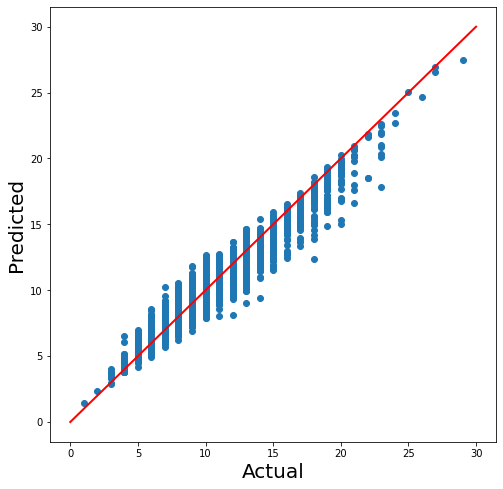

In [8]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 30], [0, 30], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight')

# SHAP

In [9]:
#Obtain shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Force Plots

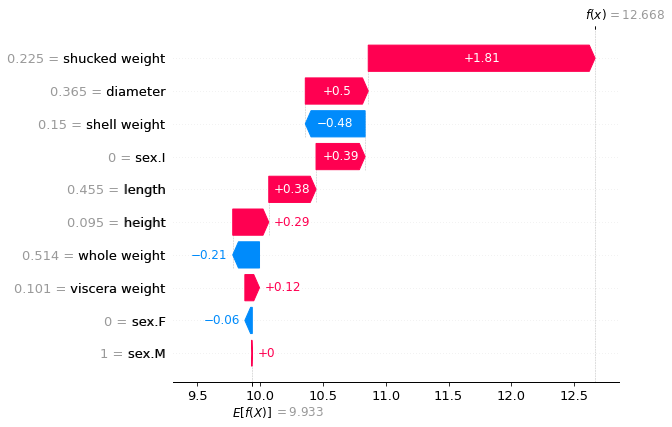

In [10]:
# Visualize the first prediction's explanation
from matplotlib import pyplot as plt
shap.plots.waterfall(shap_values[0])

In [16]:
shap.plots.force(shap_values[0])
#

In [17]:
shap.plots.force(shap_values[1])

In [18]:
shap.plots.force(shap_values[0:100])

In [39]:
# Beeswarm

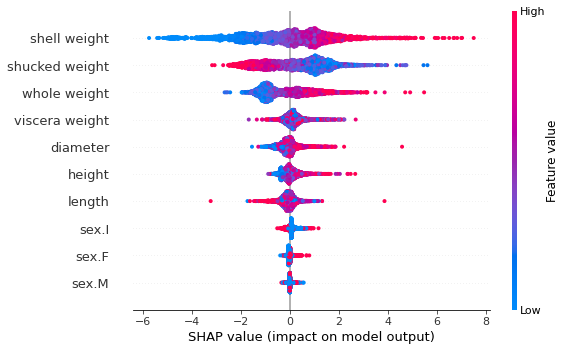

In [11]:
shap.plots.beeswarm(shap_values)

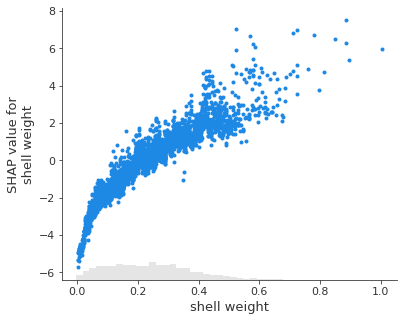

In [12]:
shap.plots.scatter(shap_values[:,"shell weight"])

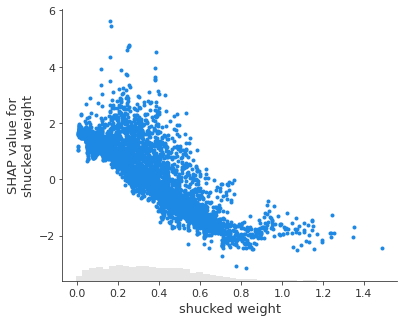

In [13]:
shap.plots.scatter(shap_values[:,"shucked weight"])

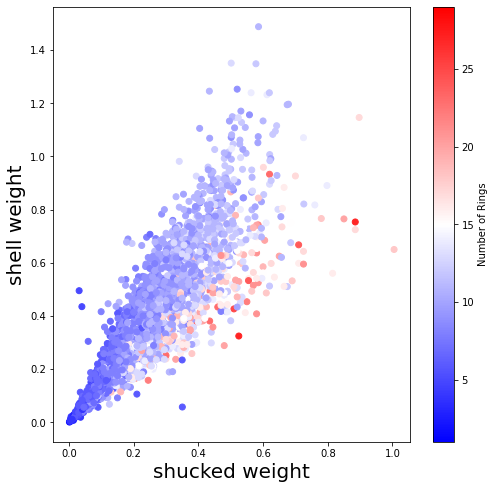

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(data["shell weight"],data["shucked weight"],c=data["rings"],cmap='bwr')
plt.colorbar(label="Number of Rings", orientation="vertical")

plt.xlabel('shucked weight',size=20)
plt.ylabel('shell weight',size=20)

plt.savefig(path.format('weight_interaction.png'),dpi=200,bbox_inches='tight')

## Mean SHAP

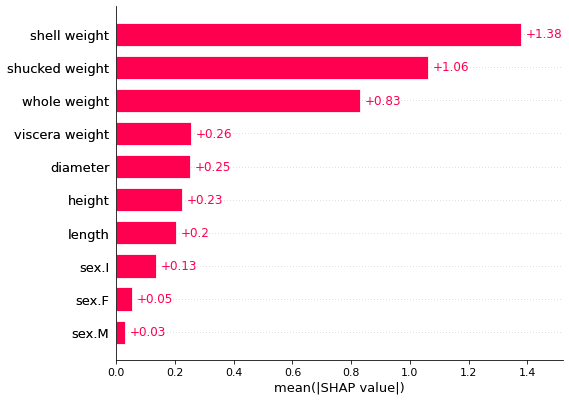

In [15]:
shap.plots.bar(shap_values)

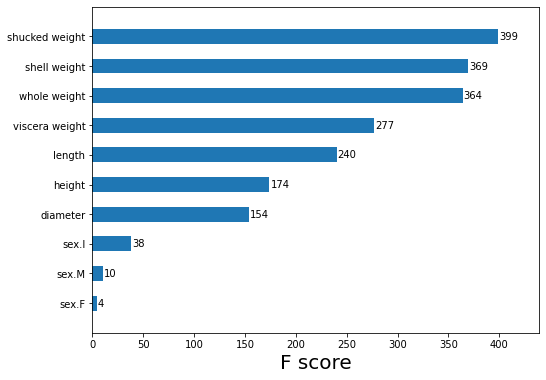

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
plot_importance(model,ax=ax,grid=False,height=0.5)

plt.title('')
plt.ylabel('')
plt.xlabel('F score',size=20)

plt.savefig(path.format('Feature_importance.png'),dpi=200 ,bbox_inches='tight')

## Binary Target Variable

In [46]:
#Binary target varibale
y = [1 if y_>10 else 0 for y_ in y]

model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

[[2446  284]
 [ 500  947]]


0.812305482403639

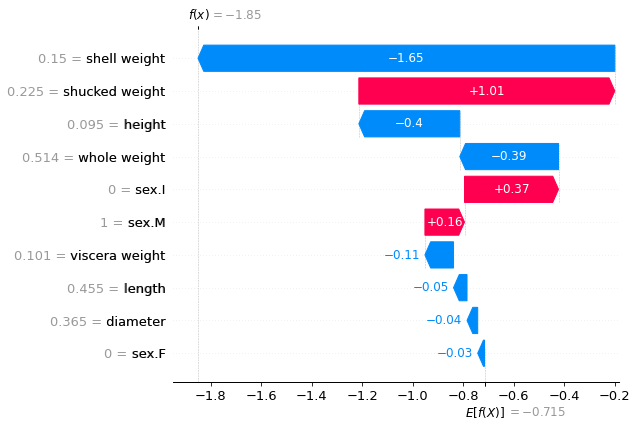

In [48]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

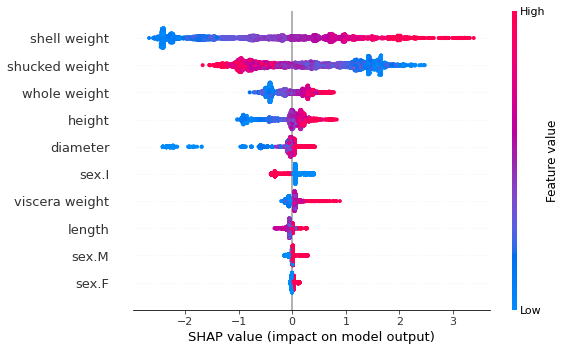

In [49]:
shap.plots.beeswarm(shap_values)